<a href="https://colab.research.google.com/github/Zohaibccna/Mynewrepo/blob/main/Zohaib_Khan_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stable-baselines3[extra]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.6 MB/s eta 0:00:00
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=a8dbb87d4dfda3c2523b416b811427366e707963cee9fe3cb352c5b5420dd71f
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


Downloading...
From (original): https://drive.google.com/uc?id=1MP4nlCx4520VWaq4LCiJ8GUA0gKx0hf8
From (redirected): https://drive.google.com/uc?id=1MP4nlCx4520VWaq4LCiJ8GUA0gKx0hf8&confirm=t&uuid=b60b1dff-d62d-4f12-a96b-86cd82c94c1a
To: /content/dataset.csv
100%|██████████| 355M/355M [00:03<00:00, 100MB/s]


Checking for NaN values in dataset...
vm_id                        200638
timestamp                    200666
cpu_usage                    199038
memory_usage                 200510
network_traffic              199481
power_consumption            200271
num_executed_instructions    199686
execution_time               199827
energy_efficiency            200042
task_type                    199962
task_priority                199433
task_status                  200306
dtype: int64


/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------
| time/              |      |
|    fps             | 589  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 516           |
|    iterations           | 2             |
|    time_elapsed         | 7             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00082915137 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -4.26         |
|    explained_variance   | 0.000102      |
|    learning_rate        | 0.0003        |
|    loss                 | 7.52e+06      |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.00124

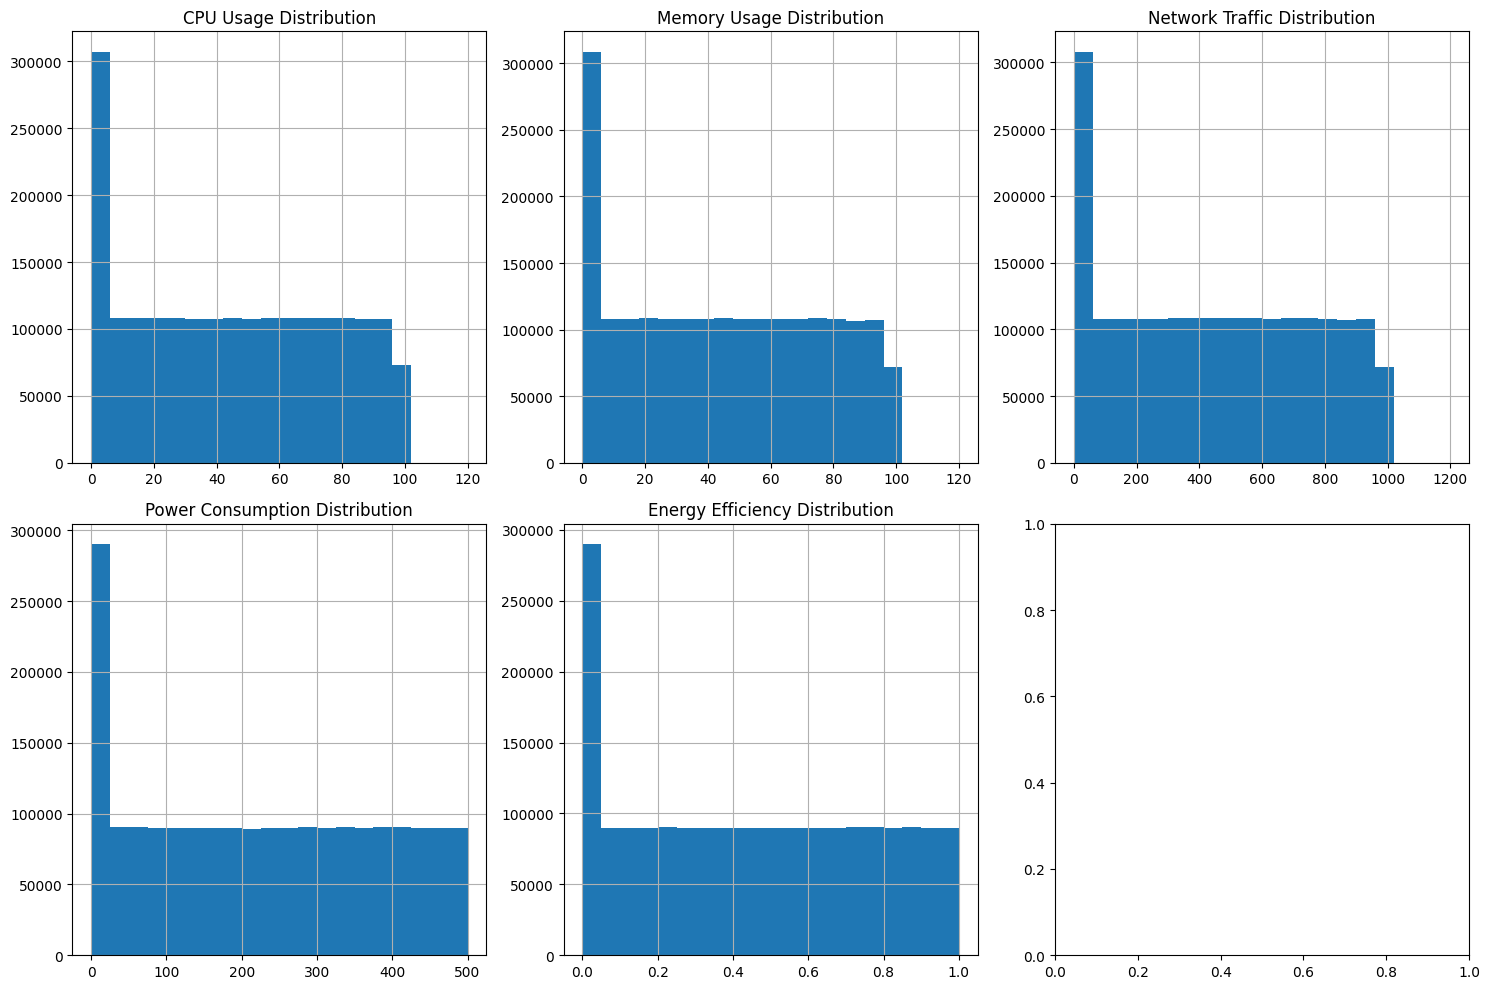

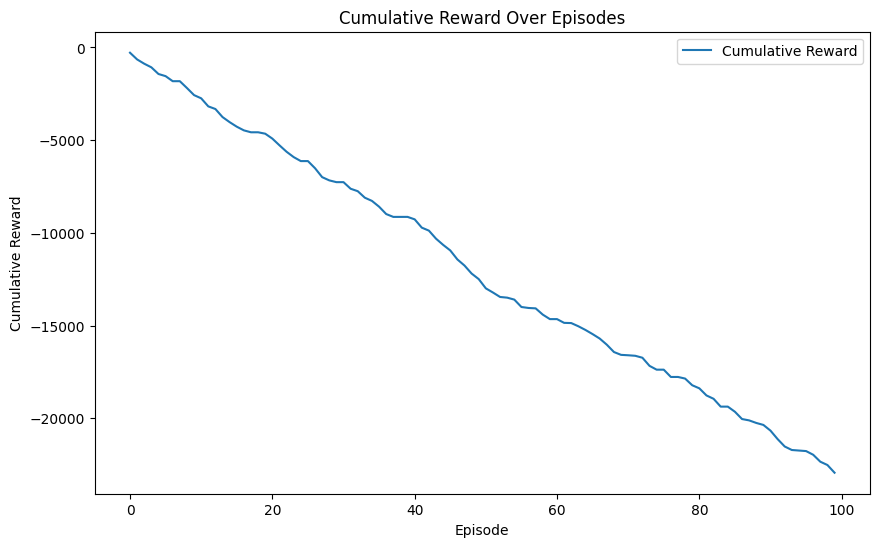

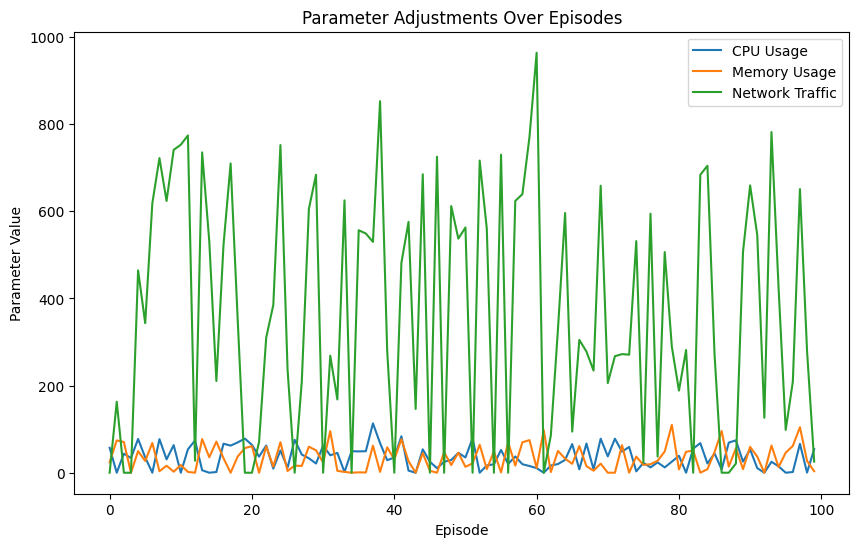

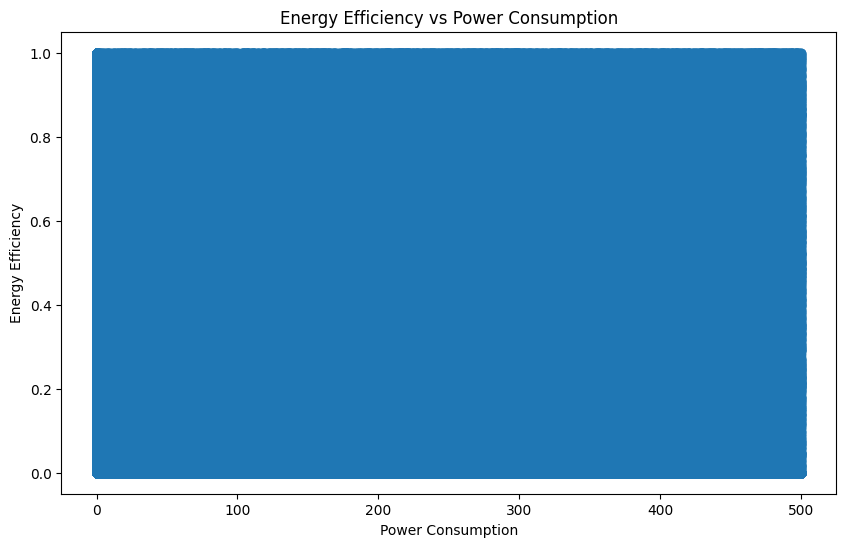

In [ ]:
# Install necessary packages
!pip install gdown stable-baselines3[extra]

import gdown
import pandas as pd
import numpy as np
import gym
from gym import spaces
from stable_baselines3 import PPO
import matplotlib.pyplot as plt

# Download the dataset
url = "https://drive.google.com/uc?id=1MP4nlCx4520VWaq4LCiJ8GUA0gKx0hf8"
output = "dataset.csv"  # Save to the current working directory
gdown.download(url, output, quiet=False)

# Load dataset
data = pd.read_csv(output)

# Check for NaN values in the data
print("Checking for NaN values in dataset...")
print(data.isna().sum())
data.fillna(0, inplace=True)  # Replace NaN values with 0

# Define the environment for reinforcement learning
class VMEnvironment(gym.Env):
    def __init__(self, data):
        super(VMEnvironment, self).__init__()

        self.data = data
        self.current_step = 0

        # Define the action and observation space
        self.action_space = spaces.Box(low=np.array([0.8, 0.8, 0.8]), high=np.array([1.2, 1.2, 1.2]), dtype=np.float32)

        # Observation space for CPU usage, memory usage, network traffic, and power consumption
        self.observation_space = spaces.Box(
            low=0,
            high=1,
            shape=(4,),
            dtype=np.float32
        )

    def reset(self):
        self.current_step = 0
        return self._next_observation()

    def _next_observation(self):
        obs = np.array([
            self.data.iloc[self.current_step]['cpu_usage'],
            self.data.iloc[self.current_step]['memory_usage'],
            self.data.iloc[self.current_step]['network_traffic'],
            self.data.iloc[self.current_step]['power_consumption']
        ])

        # Avoid division by zero when normalizing
        obs = np.nan_to_num(obs / (np.max(obs) if np.max(obs) != 0 else 1))

        return obs

    def step(self, action):
        # Apply action adjustments to the environment variables
        cpu_adjust, memory_adjust, network_adjust = action
        self.data.at[self.current_step, 'cpu_usage'] *= cpu_adjust
        self.data.at[self.current_step, 'memory_usage'] *= memory_adjust
        self.data.at[self.current_step, 'network_traffic'] *= network_adjust

        # Retrieve updated values for reward calculation
        efficiency = self.data.iloc[self.current_step]['energy_efficiency']
        power = self.data.iloc[self.current_step]['power_consumption']

        # Check for NaN in reward components
        if np.isnan(efficiency) or np.isnan(power):
            print(f"Warning: NaN encountered in reward calculation at step {self.current_step}")
            efficiency = 0  # Substitute reasonable default values
            power = 1       # Prevent NaN in reward

        reward = efficiency - power  # Aim to maximize efficiency and reduce power consumption

        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.data) - 1

        return self._next_observation(), reward, done, {}

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, CPU: {self.data.iloc[self.current_step]['cpu_usage']}, "
              f"Memory: {self.data.iloc[self.current_step]['memory_usage']}, "
              f"Network: {self.data.iloc[self.current_step]['network_traffic']}, "
              f"Power: {self.data.iloc[self.current_step]['power_consumption']}, "
              f"Efficiency: {self.data.iloc[self.current_step]['energy_efficiency']}")

# Initialize the environment
env = VMEnvironment(data)

# Initialize the PPO model
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Test the model and collect data for visualization
obs = env.reset()
rewards = []
cpu_usage, memory_usage, network_traffic = [], [], []
for i in range(100):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    rewards.append(reward)

    cpu_usage.append(env.data.iloc[env.current_step]['cpu_usage'])
    memory_usage.append(env.data.iloc[env.current_step]['memory_usage'])
    network_traffic.append(env.data.iloc[env.current_step]['network_traffic'])

    env.render()
    if done:
        break

# Visualization functions
def plot_data_distributions(data):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    data[['cpu_usage']].hist(ax=axes[0], bins=20)
    axes[0].set_title('CPU Usage Distribution')

    data[['memory_usage']].hist(ax=axes[1], bins=20)
    axes[1].set_title('Memory Usage Distribution')

    data[['network_traffic']].hist(ax=axes[2], bins=20)
    axes[2].set_title('Network Traffic Distribution')

    data[['power_consumption']].hist(ax=axes[3], bins=20)
    axes[3].set_title('Power Consumption Distribution')

    data[['energy_efficiency']].hist(ax=axes[4], bins=20)
    axes[4].set_title('Energy Efficiency Distribution')

    plt.tight_layout()
    plt.show()

def plot_cumulative_reward(rewards):
    cumulative_rewards = [sum(rewards[:i+1]) for i in range(len(rewards))]
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_rewards, label="Cumulative Reward")
    plt.xlabel("Episode")
    plt.ylabel("Cumulative Reward")
    plt.title("Cumulative Reward Over Episodes")
    plt.legend()
    plt.show()

def plot_parameter_adjustments(cpu_usage, memory_usage, network_traffic):
    plt.figure(figsize=(10, 6))
    plt.plot(cpu_usage, label="CPU Usage")
    plt.plot(memory_usage, label="Memory Usage")
    plt.plot(network_traffic, label="Network Traffic")
    plt.xlabel("Episode")
    plt.ylabel("Parameter Value")
    plt.title("Parameter Adjustments Over Episodes")
    plt.legend()
    plt.show()

def plot_efficiency_vs_power(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['power_consumption'], data['energy_efficiency'], alpha=0.5)
    plt.xlabel("Power Consumption")
    plt.ylabel("Energy Efficiency")
    plt.title("Energy Efficiency vs Power Consumption")
    plt.show()

# Call visualization functions
plot_data_distributions(data)
plot_cumulative_reward(rewards)
plot_parameter_adjustments(cpu_usage, memory_usage, network_traffic)
plot_efficiency_vs_power(data)


Downloading...
From (original): https://drive.google.com/uc?id=1MP4nlCx4520VWaq4LCiJ8GUA0gKx0hf8
From (redirected): https://drive.google.com/uc?id=1MP4nlCx4520VWaq4LCiJ8GUA0gKx0hf8&confirm=t&uuid=8a49f89f-ba59-4057-a764-dc1c1644c844
To: /content/dataset.csv
100%|██████████| 355M/355M [00:01<00:00, 196MB/s]


Checking for NaN values in dataset...
vm_id                        200638
timestamp                    200666
cpu_usage                    199038
memory_usage                 200510
network_traffic              199481
power_consumption            200271
num_executed_instructions    199686
execution_time               199827
energy_efficiency            200042
task_type                    199962
task_priority                199433
task_status                  200306
dtype: int64


/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------
| time/              |      |
|    fps             | 651  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 539            |
|    iterations           | 2              |
|    time_elapsed         | 7              |
|    total_timesteps      | 4096           |
| train/                  |                |
|    approx_kl            | 0.000106972555 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -4.25          |
|    explained_variance   | -3.22e-05      |
|    learning_rate        | 0.0003         |
|    loss                 | 7.6e+06        |
|    n_updates            | 10             |
|    policy_gradient_

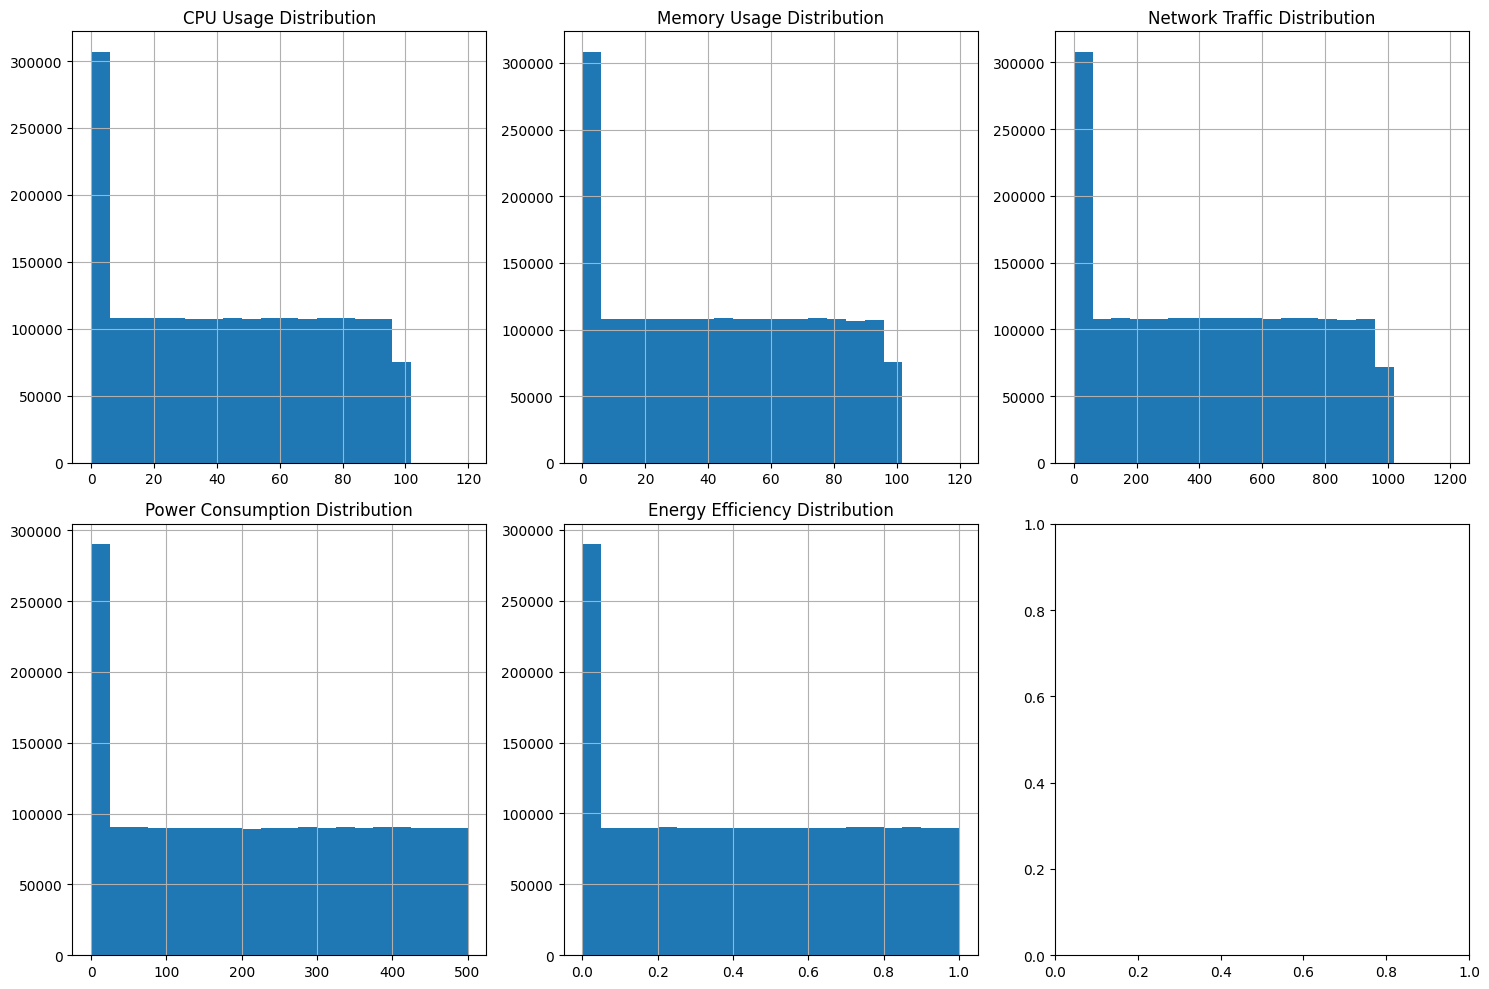

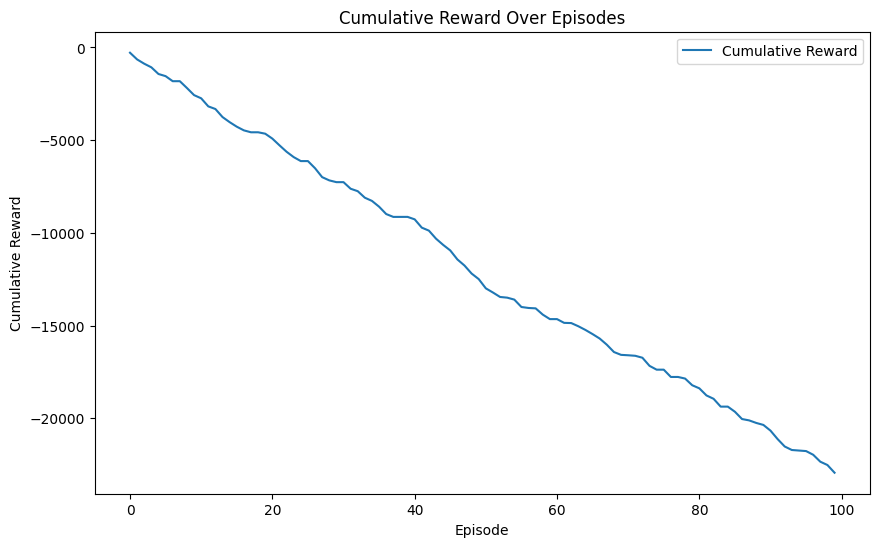

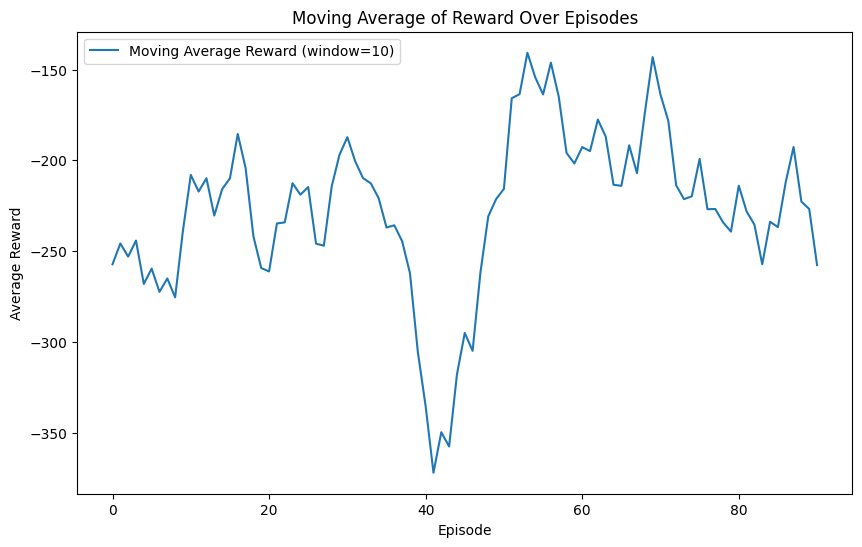

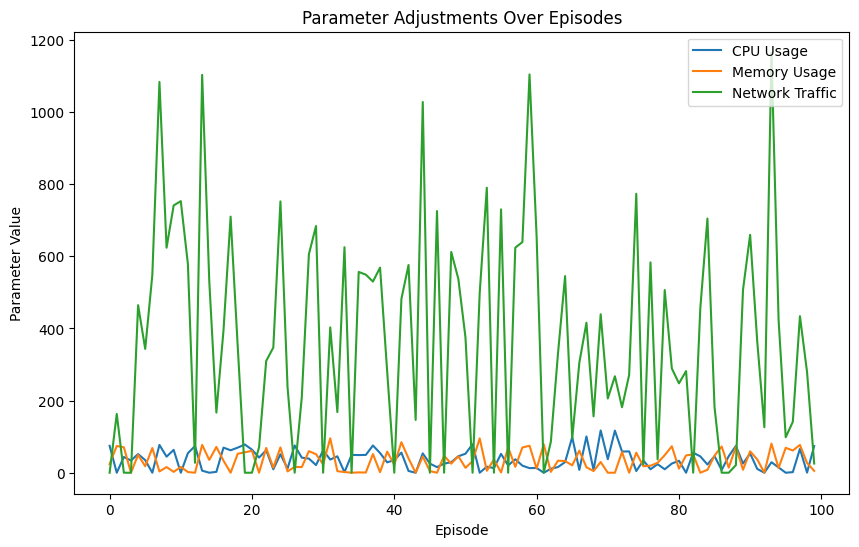

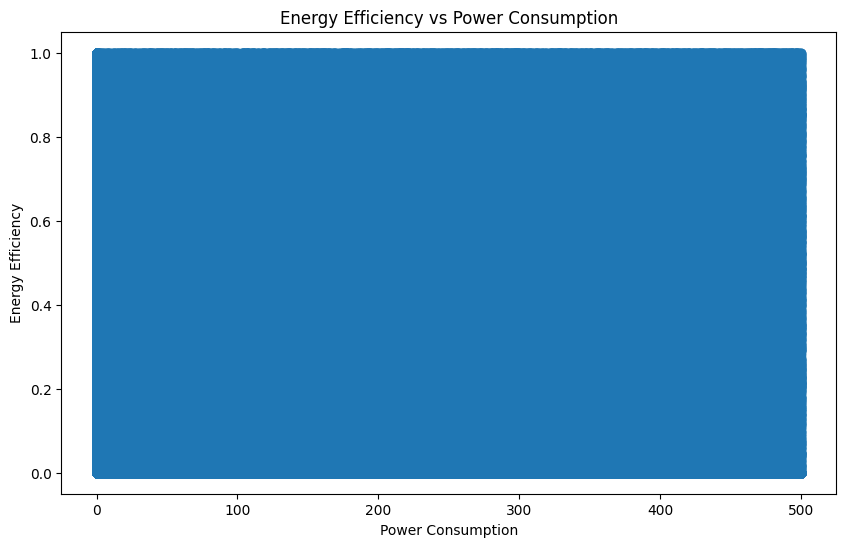

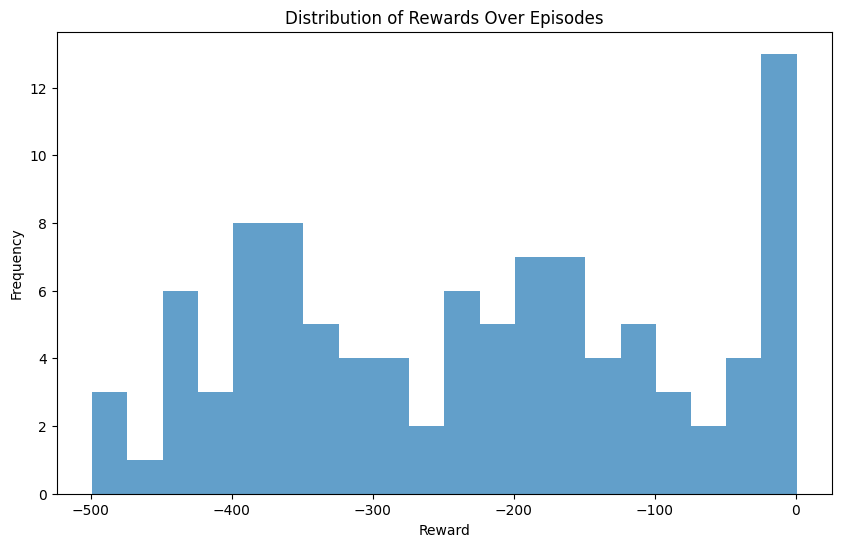

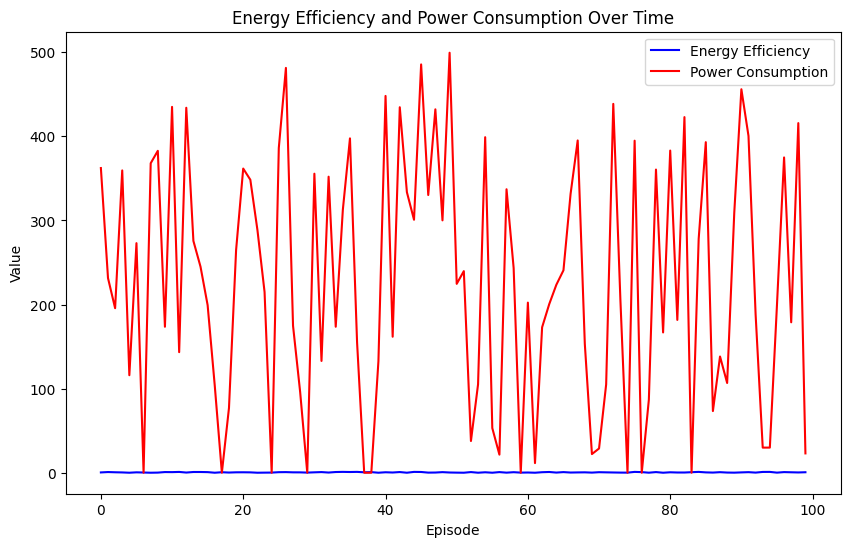

In [ ]:
# Install necessary packages
!pip install gdown stable-baselines3[extra]

import gdown
import pandas as pd
import numpy as np
import gym
from gym import spaces
from stable_baselines3 import PPO
import matplotlib.pyplot as plt

# Download the dataset
url = "https://drive.google.com/uc?id=1MP4nlCx4520VWaq4LCiJ8GUA0gKx0hf8"
output = "dataset.csv"  # Save to the current working directory
gdown.download(url, output, quiet=False)

# Load dataset
data = pd.read_csv(output)

# Check for NaN values in the data
print("Checking for NaN values in dataset...")
print(data.isna().sum())
data.fillna(0, inplace=True)  # Replace NaN values with 0

# Define the environment for reinforcement learning
class VMEnvironment(gym.Env):
    def __init__(self, data):
        super(VMEnvironment, self).__init__()

        self.data = data
        self.current_step = 0

        # Define the action and observation space
        self.action_space = spaces.Box(low=np.array([0.8, 0.8, 0.8]), high=np.array([1.2, 1.2, 1.2]), dtype=np.float32)

        # Observation space for CPU usage, memory usage, network traffic, and power consumption
        self.observation_space = spaces.Box(
            low=0,
            high=1,
            shape=(4,),
            dtype=np.float32
        )

    def reset(self):
        self.current_step = 0
        return self._next_observation()

    def _next_observation(self):
        obs = np.array([
            self.data.iloc[self.current_step]['cpu_usage'],
            self.data.iloc[self.current_step]['memory_usage'],
            self.data.iloc[self.current_step]['network_traffic'],
            self.data.iloc[self.current_step]['power_consumption']
        ])

        # Avoid division by zero when normalizing
        obs = np.nan_to_num(obs / (np.max(obs) if np.max(obs) != 0 else 1))

        return obs

    def step(self, action):
        cpu_adjust, memory_adjust, network_adjust = action
        self.data.at[self.current_step, 'cpu_usage'] *= cpu_adjust
        self.data.at[self.current_step, 'memory_usage'] *= memory_adjust
        self.data.at[self.current_step, 'network_traffic'] *= network_adjust

        efficiency = self.data.iloc[self.current_step]['energy_efficiency']
        power = self.data.iloc[self.current_step]['power_consumption']

        if np.isnan(efficiency) or np.isnan(power):
            print(f"Warning: NaN encountered in reward calculation at step {self.current_step}")
            efficiency = 0
            power = 1

        reward = efficiency - power

        self.current_step += 1
        done = self.current_step >= len(self.data) - 1

        return self._next_observation(), reward, done, {}

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, CPU: {self.data.iloc[self.current_step]['cpu_usage']}, "
              f"Memory: {self.data.iloc[self.current_step]['memory_usage']}, "
              f"Network: {self.data.iloc[self.current_step]['network_traffic']}, "
              f"Power: {self.data.iloc[self.current_step]['power_consumption']}, "
              f"Efficiency: {self.data.iloc[self.current_step]['energy_efficiency']}")

# Initialize the environment
env = VMEnvironment(data)

# Initialize the PPO model
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Test the model and collect data for visualization
obs = env.reset()
rewards = []
cpu_usage, memory_usage, network_traffic, efficiency_over_time, power_over_time = [], [], [], [], []
for i in range(100):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    rewards.append(reward)

    cpu_usage.append(env.data.iloc[env.current_step]['cpu_usage'])
    memory_usage.append(env.data.iloc[env.current_step]['memory_usage'])
    network_traffic.append(env.data.iloc[env.current_step]['network_traffic'])
    efficiency_over_time.append(env.data.iloc[env.current_step]['energy_efficiency'])
    power_over_time.append(env.data.iloc[env.current_step]['power_consumption'])

    env.render()
    if done:
        break

# Visualization functions
def plot_data_distributions(data):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    data[['cpu_usage']].hist(ax=axes[0], bins=20)
    axes[0].set_title('CPU Usage Distribution')

    data[['memory_usage']].hist(ax=axes[1], bins=20)
    axes[1].set_title('Memory Usage Distribution')

    data[['network_traffic']].hist(ax=axes[2], bins=20)
    axes[2].set_title('Network Traffic Distribution')

    data[['power_consumption']].hist(ax=axes[3], bins=20)
    axes[3].set_title('Power Consumption Distribution')

    data[['energy_efficiency']].hist(ax=axes[4], bins=20)
    axes[4].set_title('Energy Efficiency Distribution')

    plt.tight_layout()
    plt.show()

def plot_cumulative_reward(rewards):
    cumulative_rewards = [sum(rewards[:i+1]) for i in range(len(rewards))]
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_rewards, label="Cumulative Reward")
    plt.xlabel("Episode")
    plt.ylabel("Cumulative Reward")
    plt.title("Cumulative Reward Over Episodes")
    plt.legend()
    plt.show()

def plot_moving_average_reward(rewards, window=10):
    moving_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')
    plt.figure(figsize=(10, 6))
    plt.plot(moving_avg, label=f"Moving Average Reward (window={window})")
    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    plt.title("Moving Average of Reward Over Episodes")
    plt.legend()
    plt.show()

def plot_parameter_adjustments(cpu_usage, memory_usage, network_traffic):
    plt.figure(figsize=(10, 6))
    plt.plot(cpu_usage, label="CPU Usage")
    plt.plot(memory_usage, label="Memory Usage")
    plt.plot(network_traffic, label="Network Traffic")
    plt.xlabel("Episode")
    plt.ylabel("Parameter Value")
    plt.title("Parameter Adjustments Over Episodes")
    plt.legend()
    plt.show()

def plot_efficiency_vs_power(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['power_consumption'], data['energy_efficiency'], alpha=0.5)
    plt.xlabel("Power Consumption")
    plt.ylabel("Energy Efficiency")
    plt.title("Energy Efficiency vs Power Consumption")
    plt.show()

def plot_reward_distribution(rewards):
    plt.figure(figsize=(10, 6))
    plt.hist(rewards, bins=20, alpha=0.7)
    plt.xlabel("Reward")
    plt.ylabel("Frequency")
    plt.title("Distribution of Rewards Over Episodes")
    plt.show()

def plot_efficiency_and_power_over_time(efficiency, power):
    plt.figure(figsize=(10, 6))
    plt.plot(efficiency, label="Energy Efficiency", color='blue')
    plt.plot(power, label="Power Consumption", color='red')
    plt.xlabel("Episode")
    plt.ylabel("Value")
    plt.title("Energy Efficiency and Power Consumption Over Time")
    plt.legend()
    plt.show()

# Call visualization functions
plot_data_distributions(data)
plot_cumulative_reward(rewards)
plot_moving_average_reward(rewards)
plot_parameter_adjustments(cpu_usage, memory_usage, network_traffic)
plot_efficiency_vs_power(data)
plot_reward_distribution(rewards)
plot_efficiency_and_power_over_time(efficiency_over_time, power_over_time)
